In [194]:
# Aim: Implement a Simple Linear model to predict a Package based on 
#      CGPA of a student. (Use GUI)
# Binish Moosa
# 232P001
# 24
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [195]:
df = pd.read_csv('placement.csv')

In [196]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

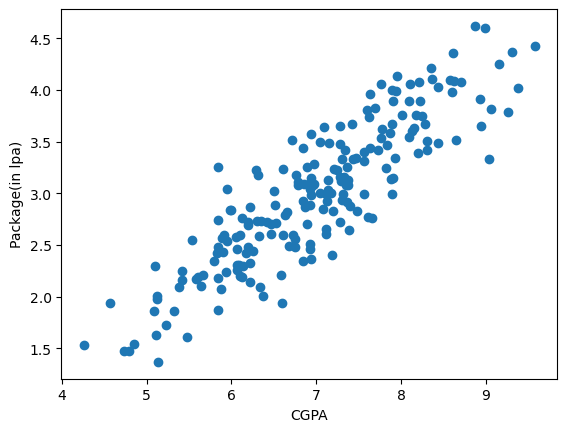

In [197]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [198]:
X = df.iloc[:,0:1] # input Column all rows0-1
y = df.iloc[:,-1] # output Column

In [199]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [200]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [201]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
# random_state ensures the same result every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
lr = LinearRegression()

In [204]:
lr.fit(X_train,y_train) # for training

LinearRegression()

In [205]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [206]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [207]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\binish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.78031348])

Text(0, 0.5, 'Package(in lpa)')

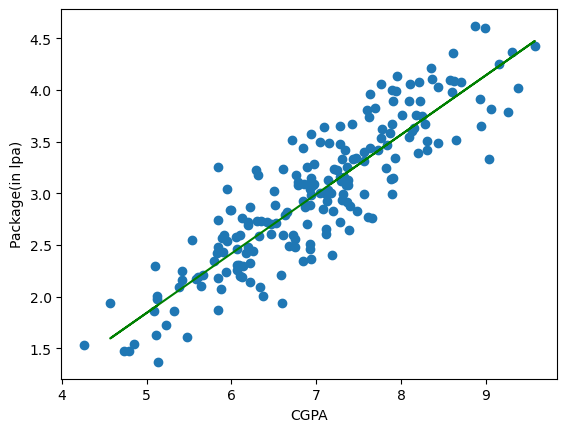

In [208]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='green') # LR calculated line
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [209]:
m = lr.coef_ # slope

In [210]:
c = lr.intercept_ # intercept

In [211]:
# y = mx + b
# x cgpa
m * 8.58 + c

array([3.9001136])

In [212]:
m * 9.78 + c

array([4.58922137])

In [213]:
m * 100 + c

array([56.39864033])

In [214]:
def predict_package():
    try:
        cgpa = float(entry_cgpa.get())  # Get CGPA from the input field
        predicted_package = lr.predict(np.array([[cgpa]]))[0]  # Predict the package
        label_predicted.config(text=f'Predicted Package: {predicted_package:.2f}')
    except ValueError:
        label_predicted.config(text="Invalid input. Please enter a valid CGPA.")


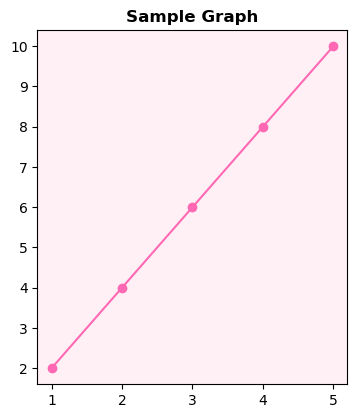

In [215]:
root = tk.Tk()
root.title("🎀 CGPA to Package Predictor 🎀")
root.geometry("800x500")
root.configure(bg="#FFE6F2") 

fig, ax = plt.subplots(figsize=(4,3))
ax.plot([1,2,3,4,5],[2,4,6,8,10], marker="o", color="#ff69b4") 
ax.set_title("Sample Graph", fontsize=12, fontweight="bold")
ax.set_facecolor("#fff0f5") 

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=1, padx=20, pady=20)


frame_right = tk.Frame(root, bg="#FFE6F2")
frame_right.pack(side=tk.LEFT, padx=30, pady=30, fill=tk.Y)

label_title = tk.Label(
    frame_right, text="📊 Predict Your Placement Package\nMade with 💖 by Binish",
    font=("Arial", 16, "bold"), bg="#FFE6F2", fg="#333"
)
label_title.pack(pady=15)

label_cgpa = tk.Label(
    frame_right, text="Enter CGPA :",
    font=("Arial", 12, "bold"), bg="#FFE6F2"
)
label_cgpa.pack(pady=5)

entry_cgpa = ttk.Entry(frame_right, width=15, font=("Arial", 12))
entry_cgpa.pack(pady=5)

# Button Style
style = ttk.Style()
style.configure("TButton", font=("Arial", 12, "bold"), padding=8)
style.map("TButton", background=[("active", "#ff66b2")])

btn_predict = ttk.Button(frame_right, text="✨ Predict ✨", command=predict_package)
btn_predict.pack(pady=15)

# Prediction Output
label_predicted = tk.Label(
    frame_right, text="Predicted Package : ",
    font=("Arial", 12, "bold"), bg="#FFE6F2", fg="#006400"
)
label_predicted.pack(pady=10)

root.mainloop()